#### Análisis exploratorio

En general se va considerar 7 etapas para un análisis exploratorio

1. Clarificar la pregunta o preguntas que quisieramos responder.
2. Tener una idea general del dataset o datasets.
3. Verificar los tipos de datos que tenemos.
4. Elegir estadísticas descriptivas para los datos.
5. Visualizar datos.
6. Analizar posibles interacciones entre variables.
7. Extraer algunas conclusiones y eventualmente dar linéas directoras para un análisis más profundo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
B=pd.read_csv('bank.csv',sep=';')
B.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


1. Hay que tener discusiones con las personas que nos están solicitando el análisis. A partir de dichas charlas tratar de formular preguntas a responder con el dataset. Estas discuciones nos permiten delimitar el trabajo a realizar

1. Porcentaje de personas que usan telefono fijo en vez de celular
2. Clasificación, número y porcentaje de personas de acuerdo al trabajo.
3. Relación entre el tipo de trabajo + educación y si han abierto un depósito en el banco
4. Relación si tienen credito hipotecario o personal con el depósito en el banco
5. Relación entre el ultimo contacto y el deposito en el banco (promedio)
6. Relación de apuerta de cuentas por bloques de edades.

2. Aquí se debe mirar en detalle el dataset sobre todo verificar que no hay que realizar etapas de limpieza, esencialmente para verificar que se puede trabajar con el. En el caso de requerir limpieza de datos realizarla con los objetivos planteados en la etapa 1. 

In [3]:
B.shape

(4119, 21)

In [4]:
B.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
columna=B.columns
DatosFaltantes=B.isna().sum()
DatosFaltantes

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
B.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [7]:
B.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
B.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [9]:
B.contact[B.contact=='cellular'].count(),B.contact[B.contact=='telephone'].count()

(2652, 1467)

Las variables categóricas más bien están bien definidas para sacar las conclusiones que deseamos

Lo que vamos a hacer es reducir columnas de alguna manera

In [10]:
B.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [11]:
columna

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
columnasSeleccionadas=['age', 'job', 'marital', 'education', 'default',
       'contact', 'pdays',
       'previous', 'y']

In [13]:
columnasSeleccionadas

['age',
 'job',
 'marital',
 'education',
 'default',
 'contact',
 'pdays',
 'previous',
 'y']

In [14]:
B2=B[columnasSeleccionadas]
B2.head()

,age,job,marital,education,default,contact,pdays,previous,y
0,30,blue-collar,married,basic.9y,no,cellular,999,0,no
1,39,services,single,high.school,no,telephone,999,0,no
2,25,services,married,high.school,no,telephone,999,0,no
3,38,services,married,basic.9y,no,telephone,999,0,no
4,47,admin.,married,university.degree,no,cellular,999,0,no


In [15]:
BH1=pd.get_dummies(B.housing)
BH2=pd.get_dummies(B.loan)

In [16]:
def CreacionHipoteca(BH1,BH2):
    n=len(BH1)
    Salida=np.zeros(n)
    for i in range(n):
        if BH1.yes[i]==1:
            Salida[i]=1
        elif BH1.unknown[i]==1:
            if BH2.yes[i]==1:
                Salida[i]=1
            else:
                Salida[i]=-1
        else:
            if BH2.yes[i]==1:
                Salida[i]=1
            elif BH2.unknown[i]==1:
                Salida[i]=-1
    return Salida
                
            

In [17]:
B2['Hipoteca']=CreacionHipoteca(BH1,BH2)
B2.head()

C:\Users\Nicole\AppData\Local\Temp\ipykernel_20804\3787217542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B2['Hipoteca']=CreacionHipoteca(BH1,BH2)


,age,job,marital,education,default,contact,pdays,previous,y,Hipoteca
0,30,blue-collar,married,basic.9y,no,cellular,999,0,no,1.0
1,39,services,single,high.school,no,telephone,999,0,no,0.0
2,25,services,married,high.school,no,telephone,999,0,no,1.0
3,38,services,married,basic.9y,no,telephone,999,0,no,-1.0
4,47,admin.,married,university.degree,no,cellular,999,0,no,1.0


3. Una vez que tenemos el dataset limpio y con ciertos objetivos, tenemos que verificar que variables tenemos, longitud del dataset, tipos de variables (categoricas o cuantitativas), verificar que las variables cuantitativas no esten en formato string. Creación de variables de dummy de ser necesario.

In [18]:
B2.dtypes

age            int64
job           object
marital       object
education     object
default       object
contact       object
pdays          int64
previous       int64
y             object
Hipoteca     float64
dtype: object

In [19]:
temp=pd.get_dummies(B2.default)
temp2=pd.get_dummies(B2.y)
B2=B2.drop('default',axis=1)
B2=pd.concat([B2,temp.iloc[:,0],temp2.iloc[:,0]],axis=1)
B2.head()

,age,job,marital,education,contact,pdays,previous,y,Hipoteca,no,no
0,30,blue-collar,married,basic.9y,cellular,999,0,no,1.0,1,1
1,39,services,single,high.school,telephone,999,0,no,0.0,1,1
2,25,services,married,high.school,telephone,999,0,no,1.0,1,1
3,38,services,married,basic.9y,telephone,999,0,no,-1.0,1,1
4,47,admin.,married,university.degree,cellular,999,0,no,1.0,1,1


In [20]:
B2=B2.drop('y',axis=1)

In [21]:
B2.columns=['age', 'job', 'marital', 'education', 'contact', 'pdays', 'previous',
       'Hipoteca', 'default', 'y']

In [22]:
B2.head()

,age,job,marital,education,contact,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,999,0,1.0,1,1
1,39,services,single,high.school,telephone,999,0,0.0,1,1
2,25,services,married,high.school,telephone,999,0,1.0,1,1
3,38,services,married,basic.9y,telephone,999,0,-1.0,1,1
4,47,admin.,married,university.degree,cellular,999,0,1.0,1,1


In [23]:
B2.loc[:,'default']=1-B2.loc[:,'default']
B2.loc[:,'y']=1-B2.loc[:,'y']
B2.head(20)

,age,job,marital,education,contact,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,999,0,1.0,0,0
1,39,services,single,high.school,telephone,999,0,0.0,0,0
2,25,services,married,high.school,telephone,999,0,1.0,0,0
3,38,services,married,basic.9y,telephone,999,0,-1.0,0,0
4,47,admin.,married,university.degree,cellular,999,0,1.0,0,0
5,32,services,single,university.degree,cellular,999,2,0.0,0,0
6,32,admin.,single,university.degree,cellular,999,0,1.0,0,0
7,41,entrepreneur,married,university.degree,cellular,999,0,1.0,1,0
8,31,services,divorced,professional.course,cellular,999,1,0.0,0,0
9,35,blue-collar,married,basic.9y,telephone,999,0,0.0,1,0


4. Vamos a hacer más estadísticas con las variables, más en detalle y respecto a las variables que hemos considerado importantes en las etapas anteriores.

1. Porcentaje de personas que usan telefono fijo en vez de celular
2. Clasificación, número y porcentaje de personas de acuerdo al trabajo.
3. Relación entre el tipo de trabajo + educación y si han abierto un depósito en el banco
4. Relación si tienen credito hipotecario o personal con el depósito en el banco
5. Relación entre el ultimo contacto y el deposito en el banco (promedio)
6. Relación de apuerta de cuentas por bloques de edades.

In [24]:
 1-B2.contact[B2.contact=='cellular'].count()/len(B2)

0.3561544064093226

4.1. Existe 35.62% de personas que utilizan el celular en vez del telefono fijo para contacto.

In [25]:
Agrupa1=B2.groupby('job')
Agrupa1_2=Agrupa1[['age']].count()
Agrupa1_2

,age
job,
admin.,1012
blue-collar,884
entrepreneur,148
housemaid,110
management,324
retired,166
self-employed,159
services,393
student,82


In [26]:
Agrupa1_2.index

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object', name='job')

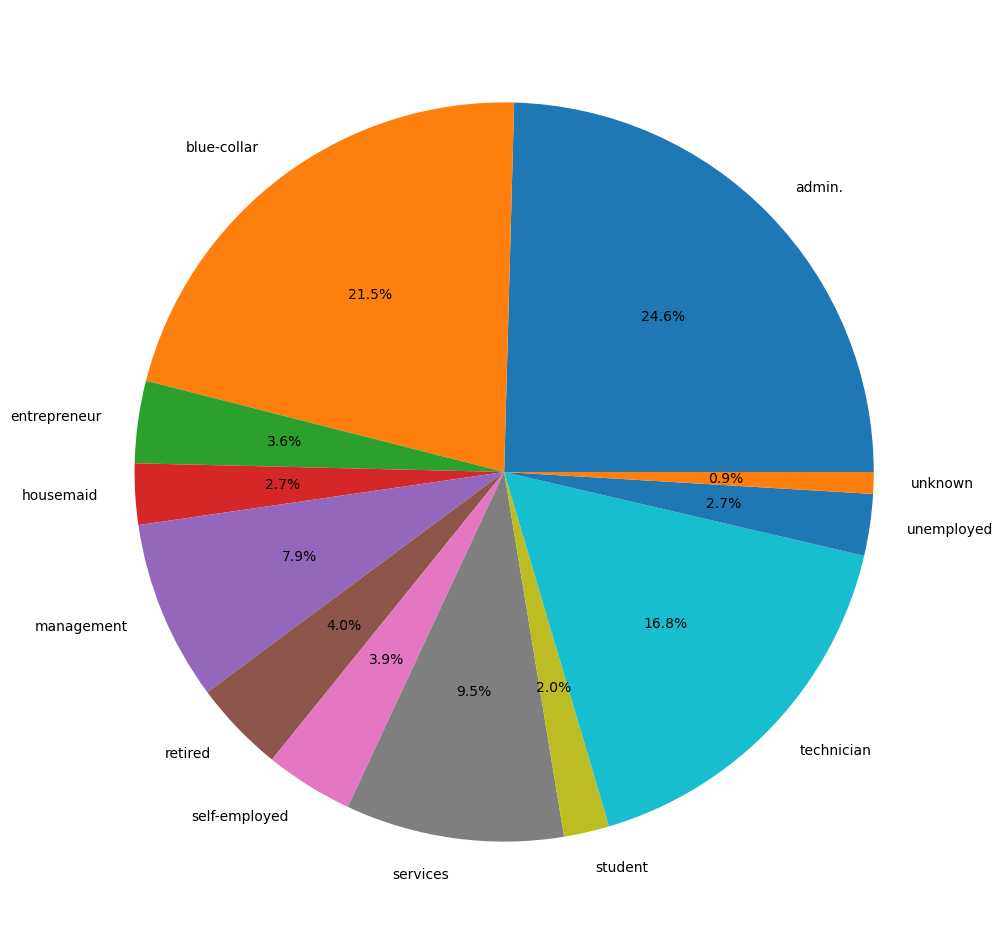

In [27]:
plt.figure(figsize=(12,12))
plt.pie(np.array(Agrupa1_2['age']),labels=Agrupa1_2.index,autopct='%1.1f%%')
plt.show()

4.2. Clasificación de personas de acuerdo al trabajo

In [28]:
Agrupa2=B2.groupby(['job'])
Agrupa2.y.sum()

job
admin.           133
blue-collar       61
entrepreneur       8
housemaid         11
management        30
retired           38
self-employed     13
services          35
student           19
technician        80
unemployed        19
unknown            4
Name: y, dtype: uint8

In [29]:
Agrupa3=B2.groupby(['education'])
Agrupa3.y.sum()

education
basic.4y                38
basic.6y                17
basic.9y                43
high.school             97
illiterate               0
professional.course     65
university.degree      165
unknown                 26
Name: y, dtype: uint8

In [30]:
Agrupa2.y.sum().sum(),Agrupa3.y.sum().sum()

(451, 451)

In [31]:
Agrupa2.y.sum()/Agrupa2.y.count()*100

job
admin.           13.142292
blue-collar       6.900452
entrepreneur      5.405405
housemaid        10.000000
management        9.259259
retired          22.891566
self-employed     8.176101
services          8.905852
student          23.170732
technician       11.577424
unemployed       17.117117
unknown          10.256410
Name: y, dtype: float64

In [32]:
Agrupa3.y.sum()/Agrupa3.y.count()*100

education
basic.4y                8.857809
basic.6y                7.456140
basic.9y                7.491289
high.school            10.532030
illiterate              0.000000
professional.course    12.149533
university.degree      13.053797
unknown                15.568862
Name: y, dtype: float64

4.3. Los estudiantes y los retirados son los más propensos a abrir cuentas en el banco y por otro lado los que tienen una formación universitaria.

In [33]:
B2.head()

,age,job,marital,education,contact,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,999,0,1.0,0,0
1,39,services,single,high.school,telephone,999,0,0.0,0,0
2,25,services,married,high.school,telephone,999,0,1.0,0,0
3,38,services,married,basic.9y,telephone,999,0,-1.0,0,0
4,47,admin.,married,university.degree,cellular,999,0,1.0,0,0


In [34]:
Agrupa4=B2.groupby('Hipoteca')
Agrupa4.y.sum()/Agrupa4.y.count()

Hipoteca
-1.0    0.085714
 0.0    0.112374
 1.0    0.108642
Name: y, dtype: float64

4.4. Más o menos tenemos la misma probabilidad (alrededor del 11%) de que una persona abra una cuenta en el banco indistintamente si tiene hipioteca de algún tipo o no

In [35]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values 

In [36]:
B2.age.min(),B2.age.max()

(18, 88)

In [37]:
bins=np.linspace(18,88,8)
bins

array([18., 28., 38., 48., 58., 68., 78., 88.])

In [38]:
agrupado5=B2.groupby(pd.cut(B2.age,bins))

In [39]:
agrupado5.y.sum()/agrupado5.y.count()*100

age
(18.0, 28.0]    12.958435
(28.0, 38.0]    10.035419
(38.0, 48.0]     8.485401
(48.0, 58.0]    11.213720
(58.0, 68.0]    24.576271
(68.0, 78.0]    39.285714
(78.0, 88.0]    69.230769
Name: y, dtype: float64

In [40]:
agrupado5.y.count()

age
(18.0, 28.0]     409
(28.0, 38.0]    1694
(38.0, 48.0]    1096
(48.0, 58.0]     758
(58.0, 68.0]     118
(68.0, 78.0]      28
(78.0, 88.0]      13
Name: y, dtype: int64

In [41]:
RangoEdades=[18+10*i for i in range(7)]
Edades=np.array([len(B2[(B2.age>18+10*i)&(B2.age<=18+10*(i+1))]) for i in range(7)])
DepositosEdades=np.array([B2.y[(B2.age>18+10*i)&(B2.age<=18+10*(i+1))].sum()for i in range(7)])
pd.DataFrame(
{
    'Rango Edades':RangoEdades,
    'Porcentaje':DepositosEdades/Edades*100
})
    
    

,Rango Edades,Porcentaje
0,18,12.958435
1,28,10.035419
2,38,8.485401
3,48,11.213720
4,58,24.576271
5,68,39.285714
6,78,69.230769


In [42]:
agrupado5.y.sum()/agrupado5.y.count()*100

age
(18.0, 28.0]    12.958435
(28.0, 38.0]    10.035419
(38.0, 48.0]     8.485401
(48.0, 58.0]    11.213720
(58.0, 68.0]    24.576271
(68.0, 78.0]    39.285714
(78.0, 88.0]    69.230769
Name: y, dtype: float64

4.6. Existen los grupo de mayores a 58 años que tienen ampliamente más probabilidades de abrir una cuenta.

In [43]:
agrupa6=B2.groupby('previous')
agrupa6.y.mean()*100

previous
0      8.288391
1     20.842105
2     41.025641
3     60.000000
4     71.428571
5    100.000000
6     50.000000
Name: y, dtype: float64

In [44]:
agrupa6.y.count()

previous
0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: y, dtype: int64

4.5 A mayor numero de contactos con el banco mayor probabilidad de apertura de cuentas.

In [45]:
agrupa6.pdays.mean()

previous
0    999.000000
1    808.648421
2    553.679487
3    244.520000
4    220.000000
5      4.000000
6      3.000000
Name: pdays, dtype: float64

In [46]:
agrupa7=B2.groupby(['previous','y'])
agrupa7.pdays.mean()

previous  y
0         0    999.000000
          1    999.000000
1         0    893.327128
          1    487.040404
2         0    740.152174
          1    285.625000
3         0    504.100000
          1     71.466667
4         0    506.000000
          1    105.600000
5         1      4.000000
6         0      3.000000
          1      3.000000
Name: pdays, dtype: float64

In [47]:
B2.pdays.mean()

960.4221898519058

5. Creamos gráficas para describir los diversos valores que tenemos, histogramas, diagramas de tortas, diagramas de cajas y bigotes. 

In [63]:
def getColors(leng):
    string = "0123456789abcdef"
    colors=[]
    for j in range(leng):
        color='#'
        for i in range(6):
            color+=string[np.random.randint(0,len(string))]
        colors.append(color)
    return colors

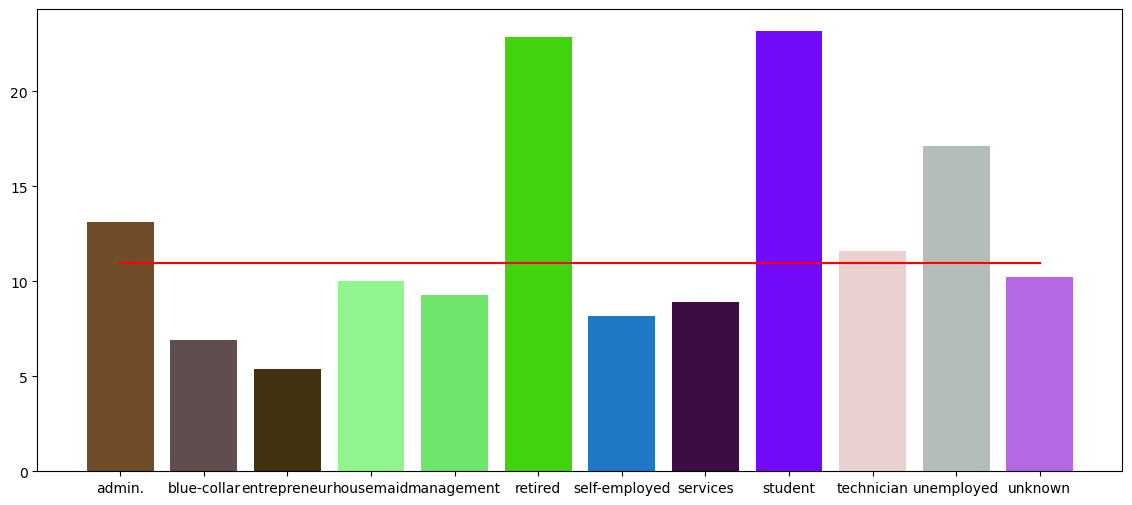

In [64]:
PorcentajesTrabajos=pd.DataFrame(Agrupa2.y.sum()/Agrupa2.y.count()*100)
plt.figure(figsize=(14,6))
plt.bar(PorcentajesTrabajos.index, PorcentajesTrabajos.y,color=getColors(len(PorcentajesTrabajos)))
Y=np.ones(len(PorcentajesTrabajos))*B2.y.mean()*100
plt.plot(PorcentajesTrabajos.index,Y,'r')
plt.show()

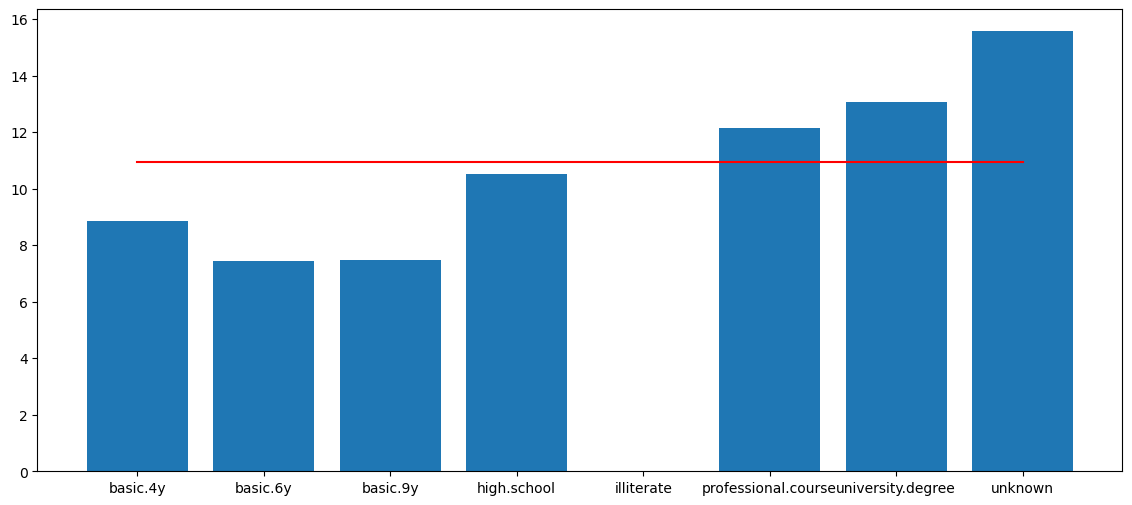

In [50]:
PorcentajesEducacion=pd.DataFrame(Agrupa3.y.sum()/Agrupa3.y.count()*100)
plt.figure(figsize=(14,6))
plt.bar(PorcentajesEducacion.index, PorcentajesEducacion.y)
Y=np.ones(len(PorcentajesEducacion))*B2.y.mean()*100
plt.plot(PorcentajesEducacion.index,Y,'r')
plt.show()

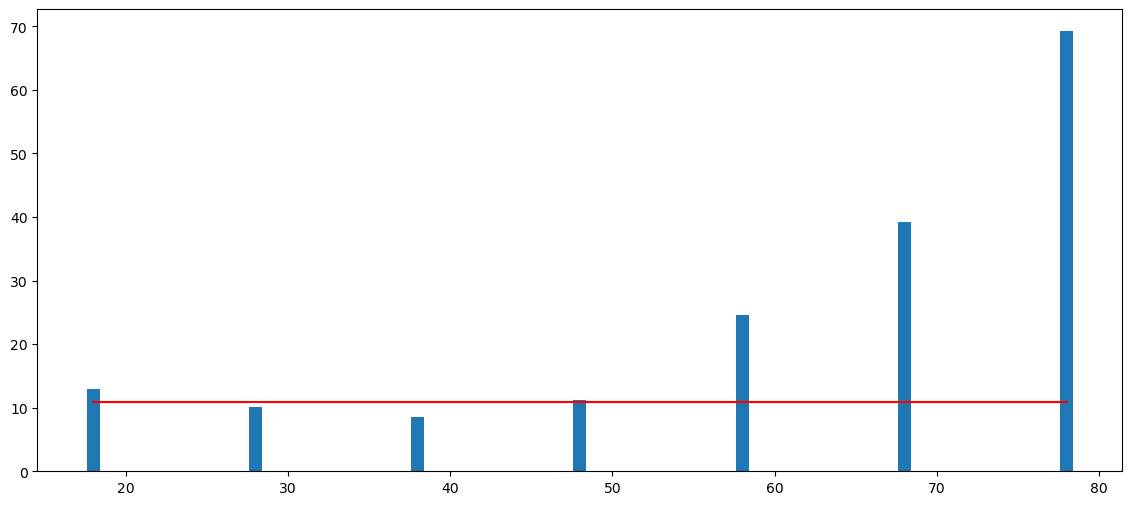

In [51]:
PorcentajesEdades=pd.DataFrame(
{
    'Rango Edades':RangoEdades,
    'Porcentaje':DepositosEdades/Edades*100
})
plt.figure(figsize=(14,6))
plt.bar(PorcentajesEdades['Rango Edades'], PorcentajesEdades.Porcentaje)
Y=np.ones(len(PorcentajesEdades.Porcentaje))*B2.y.mean()*100
plt.plot(PorcentajesEdades['Rango Edades'],Y,'r')
plt.show()

6. En esta etapa vamos a hacer gráficas para ver las relaciones entre las variables, plot clasica, nubes de puntos, graficas de correlación, entre otras para vérificar las relaciones entre las variables que hemos identificado en etapas anteriores

In [52]:
B2.head()

,age,job,marital,education,contact,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,999,0,1.0,0,0
1,39,services,single,high.school,telephone,999,0,0.0,0,0
2,25,services,married,high.school,telephone,999,0,1.0,0,0
3,38,services,married,basic.9y,telephone,999,0,-1.0,0,0
4,47,admin.,married,university.degree,cellular,999,0,1.0,0,0


In [53]:
B2.corr()

,age,pdays,previous,Hipoteca,default,y
age,1.000000,-0.043425,0.050931,-0.004112,0.161427,0.060374
pdays,-0.043425,1.000000,-0.587941,-0.017733,0.089514,-0.332012
previous,0.050931,-0.587941,1.000000,0.009431,-0.092754,0.255697
Hipoteca,-0.004112,-0.017733,0.009431,1.000000,-0.008796,0.000613
default,0.161427,0.089514,-0.092754,-0.008796,1.000000,-0.076567
y,0.060374,-0.332012,0.255697,0.000613,-0.076567,1.000000


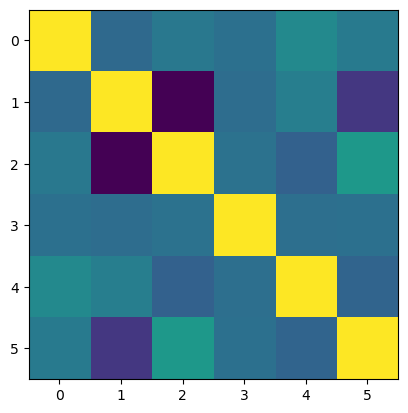

In [54]:
plt.imshow(B2.corr())
plt.show()

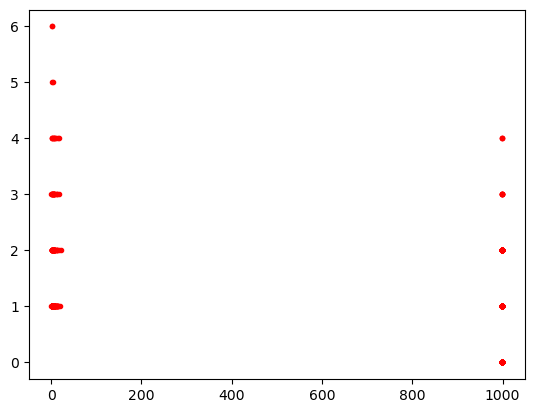

In [55]:
plt.plot(B2.pdays,B2.previous,'r.')
plt.show()

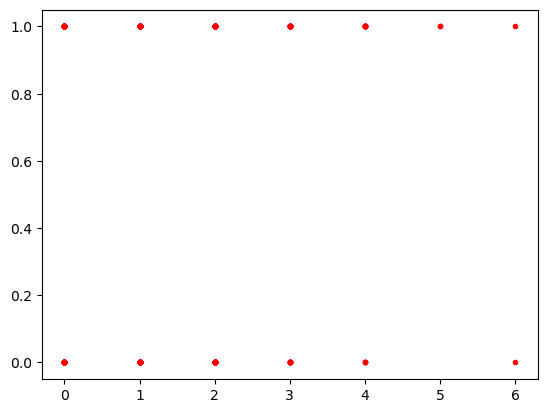

In [56]:
plt.plot(B2.previous,B2.y,'r.')
plt.show()

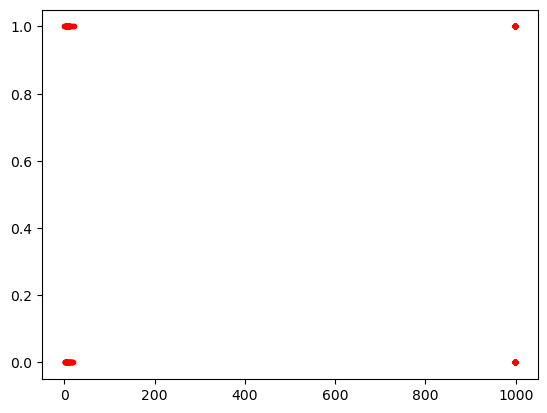

In [57]:
plt.plot(B2.pdays,B2.y,'r.')
plt.show()

7. En función de lo visto anteriormente y con las preguntas en mente, sacar conclusiones y recomendaciones.

Hemos visto la relación que existe entre diversas variables categóricas y la probabilidad de apertura de cuenta en el banco.

Se han determinado que existe una probabilidad del 11% de apertura de cuenta en las campañas, donde los grupos de mayor recepción son los grupos de estudiantes, retirados y desempleados. mayores a 58 años y con formación profesional o universitaria. 

Por otro lado se puede ver que a mayor contacto con el cliente es mayor la probabilidad de apertura de cuenta y que no van a pasar demasiados días entre el contacto y una apertura de cuenta reduciendo aproximadamente de 400 días a 200 o 100 a mayor número de contactos.